In [43]:
import geopandas as gpd
import rasterio as rio
import gridfinder as gf

In [48]:
hrsl = "data/hrsl/hrsl_moz_pop_deflate.tif"
with rio.open(hrsl) as ds:
    prof = ds.profile.copy()

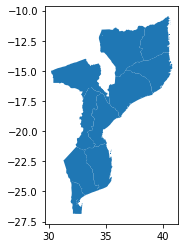

In [6]:
aoi = gpd.read_file("data/gadm/gadm36_MOZ.gpkg", layer="gadm36_MOZ_1")
aoi.plot()

In [62]:
for idx, row in aoi.iterrows():
    print(idx, row.NAME_1)
    g = gpd.GeoDataFrame(row.to_frame().transpose())
    g.crs = aoi.crs
    clipped, aff, crs = gf.clip_raster(hrsl, g)
    prof.update(
        height=clipped.shape[0], width=clipped.shape[1], transform=aff,
    )
    f = f"data/hrsl/prov_{idx:02}.tif"
    with rio.open(f, "w", **prof) as ds:
        ds.write(clipped, indexes=1)

0 Cabo Delgado
1 Gaza
2 Inhambane
3 Manica
4 Maputo
5 Maputo City
6 Nampula
7 Nassa
8 Sofala
9 Tete
10 Zambezia
